# Use Cases for Linear and Logistic Regression with Scikit-Learn

* **Continuous Predictors**
    * Linear Regression 
    * Tree Regression
* **Binary Classifiers**
    * Logistic Regression
    * Naive Bayes (if Time)
    
We'll use my good friend Scikit-Learn: http://scikit-learn.org/stable/

## Continuous Variables & Linear Regression

Outcomes can take on a real-value in a range between $-\inf$ and $\inf$. It's still good if your predictors only take on a range between certain values. 

Formula in the form $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon$, where $\epsilon$ is the error term. Includes things we forgot to include, things we can't measure, measurement error, etc. 

Each $\beta$ is the value we expect per a one-unit change in the corresponding $X$. So if $\beta_3 = 4.3$, we expect $Y$ to go up $4.3$ units whenever $X_3$ increase by one-unit. 

Fit in the new data into the formula, multiply by the $\beta$'s and that's your prediction

We use the form $\hat{Y} = \hat{\beta_0} + \hat{\beta_1} X_1 + \hat{\beta_2} X_2 + ... + \hat{\beta_n} X_n$ where the 'hats' show those are the calculated values, nor the error. 

## Calculating the X's 

We use a series of matrix operations to calculate the values of the $\beta$'s. 

$$ X = 
\begin{matrix}
1 & X_{1,1} & X_{1,2} & X_{1,3} &...& X_{1,n}\\
1 & X_{2,1} & X_{2,2} & X_{2,3} &...& X_{2,n}\\
\vdots & \vdots & \vdots & \vdots& \ddots & \vdots \\
1 & X_{m,1} & X_{m,2} & X_{m,3} &...& X_{m,n}
\end{matrix}$$

Where the $X$'s are our data points. 

We do some matrix operations: $(X^TX)^{-1}X^T y = \hat{\underline{\beta}}$ to generate our coefficients. Then we use the formula $\hat{Y} = \hat{\underline{\beta}}X$ to get our predictions. 

We don't actually do this. Matrix operations are insanely expensive for computers to perform. Matrix multiplication is $O(n^{2.373})$ under the fastest matrix multiplication algorithms. So computers use a gradient descent algorithm that tries to minimize the squared distance between the predicted outcomes and the actual outcomes.

We define the residuals, $r$, as $r = \hat{Y} - Y$. We want those residuals to look like random noise, and ideally normally distributed with mean 0. 
<img src = "good_resids1.png">

Residuals with a pattern suggest we missed something 
<img src = "bad_resids.png">



## Let's Look at Some Data

We'll use the Boston Housing Data for this. 

In [30]:
import numpy as np
import pandas as pd 
boston = pd.read_csv("/Users/evancolvin/dropbox/projects/PyData/Boston.csv", sep = '\t')
cancer = pd.read_csv("/Users/evancolvin/dropbox/projects/PyData/cancer.csv")

import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
boston.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9




* **crim:** Per Capita Crime per Town
* **zn:** proportion of residential land zoned for lots over 25,000 sq.ft
* **indus:** proportion of non-retail business acres per town
* **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* **nox:** nitrogen oxides concentration (parts per 10 million)
* **rm:** average number of rooms per dwelling
* **age:** proportion of owner-occupied units built prior to 1940
* **dis:** weighted mean of distances to five Boston employment centres
* **rad:** index of accessibility to radial highways
* **tax:** full-value property-tax rate per <span>$</span>10,000
* **ptratio:** pupil-teacher ratio by town
* **black:** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **lstat:** lower status of the population (percent)
* **medv:** median value of owner-occupied homes in 1000s. <--What we Want to Predict


In [32]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [33]:
cancer.describe()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Brand Chromatin,Normal Nucleoli,Mitosis,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Splitting the data sets for cross-validation 

Simple training and test sets with 70% of the day and 30% of the data respectively. 

In [34]:
from sklearn.cross_validation import train_test_split as split
boston_train, boston_test = split(boston, test_size = .30)
cancer_train, cancer_test = split(cancer, test_size = .30)

## Linear Regression 

In [35]:
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 
            'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
target = 'medv'
predictor_data = boston_train[features].values
median_price = boston_train[target].values

R2 0.738997625457


intercept: 40.8968130631
crim: -0.0539408946798
zn: 0.0493699460351
indus: 0.0507447173769
chas: 3.97291325389
nox: -15.5988827731
rm: 3.03820627625
age: 0.00141154582491
dis: -1.29957330381
rad: 0.30438214487
tax: -0.0133889512067
ptratio: -1.04001863779
black: 0.0105704606479
lstat: -0.583174491065


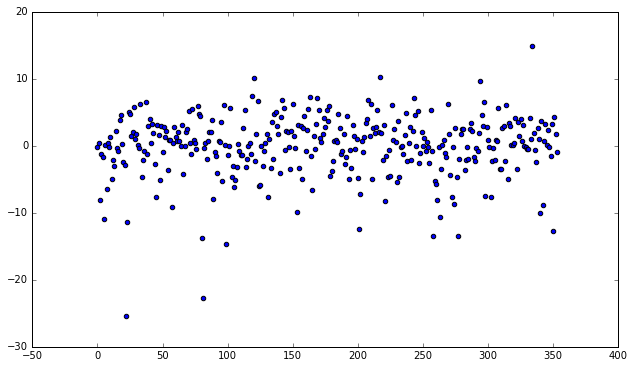

In [36]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(predictor_data, median_price)


y_hat = linear_regression.predict(predictor_data)
resids = y_hat - median_price
plt.figure(figsize = (10.5, 6))
plt.scatter(range(len(median_price)), resids)


print "R2 " + str(linear_regression.score(predictor_data, median_price)) + "\n\n"
coefficients = linear_regression.coef_.tolist()
print "intercept: " + str(linear_regression.intercept_)
for predictor in range(len(features)):
    print features[predictor] + ": " + str(coefficients[predictor])

In [37]:
testing_data = boston_test[features].values
testing_targets = boston_test[target].values
new_predictions = linear_regression.predict(predictor_data)
print "The first predictions for prices are: "
for i in range(10):
    print "\t" + str(new_predictions[i])
    
#print linear_regression.predict(testing_data)[:10]
R2 = linear_regression.score(testing_data, testing_targets)
print "\nAnd the R-Squared value for the unseen data is: " + str(R2)

The first predictions for prices are: 
	35.8911585503
	27.5575645252
	33.1818723397
	22.1451647068
	12.3842951453
	12.152815309
	20.309225648
	16.7330372915
	31.9338756575
	30.5099771081

And the R-Squared value for the unseen data is: 0.723654914036


## Regression Trees 

"Prediction trees use the tree to represent the recursive partition. Each of the terminal nodes, or leaves, of the tree represents a cell of the partition, and has attached to it a simple model which applies in that cell only. A point x belongs to a leaf if x falls in the corresponding cell of the partition."--Cosma Shalizi 

* Data "splits" to make the predictions
* Greedy algorithm: makes best choice at each stage; doesn't look far ahead
* May miss a really good split down the line 
* Bagging: Combining similar trees and averaging outcome
* Random Forest: Combining vastly different trees and average outcome
    * Does this by hiding data from the trees at different time so optimum's look different
    * Leo Breiman: Can't Overfit 

<img src="https://camo.githubusercontent.com/4dad481e246c73548fb37cb3dc26ea106a2494dc/687474703a2f2f65636f6c6f67792e6d73752e6d6f6e74616e612e6564752f6c61626473762f522f6c6162732f6c6162362f64656d6f5f332e706e67">

In [38]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth = 10)
tree.fit(predictor_data, median_price)
from sklearn.metrics import r2_score
print "The R2 for the Tree Regression is " + str(r2_score(median_price, tree.predict(predictor_data)))

The R2 for the Tree Regression is 0.990922323843


In [39]:
new_preds = tree.predict(testing_data)
print "The R2 for the new data is " + str(r2_score(testing_targets, new_preds))

The R2 for the new data is 0.839568046061


## Classification & Logistic Regression 

### Logistic Regression 
* Feed linear regression into the sigmoid function $S(t) = \frac{1}{1 + e^{-t}}$ where $t$ is the linear regression
* Used for binary classification
    * $ \le .5 \Rightarrow$ class 0
    * $ > .5 \Rightarrow$ class 1
* Need new metrics since $R^2$ doesn't make sense here 
    * Log-Loss if you predict probabilities (big for Kaggle)
    * Accuracy score that looks at the proportion of the correctly classified 

<img src="sigmoid.png">

In [40]:
cancer.head(20)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Brand Chromatin,Normal Nucleoli,Mitosis,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [41]:
cancer.describe()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Brand Chromatin,Normal Nucleoli,Mitosis,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [42]:
features = ['Clump Thickness', 'Uniformity of Cell Shape', 'Marginal Adhesion', 
            'Single Epithelial Cell Size', 'Brand Chromatin', 'Normal Nucleoli', 'Mitosis']
target = 'Class'
predictor_data = cancer_train[features].values
cell_class = cancer_train[target].values

In [43]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(predictor_data, cell_class)
from sklearn.metrics import accuracy_score
print "The model predicts " + str(accuracy_score(cell_class, logistic_regression.predict(predictor_data))*100) + "% of the cells accurately"

The model predicts 96.5235173824% of the cells accurately


In [44]:
validation_data = cancer_test[features].values
validation_target = cancer_test[target].values

In [45]:
new_preds = logistic_regression.predict(validation_data)
print "Also predicts " + str(accuracy_score(validation_target, new_preds)*100) + "% of new observations"

Also predicts 95.7142857143% of new observations


## Naive Bayes

New Belief = Old Belief $\times$ Likelihood of Evidence / Evidence $\leftarrow$ Bayes' Rule

* "Naive" Because the algorithm assumes all predictors are conditionally independent of other predictors, which is dumb
* Uses the top half of Bayes rule and compares the two classes; Selects the larger value for classes
* Probabilities tend towards 0 and 1 
    * Principle components vote more than once, skewing the results
* Used for spam classifiers 
* Converges into Logistic Regression as the predictors become more and more independent
* Gaussian Naive Bayes assumes underlying probabilities are normally distributed 
* You can start with "priors" and weight for data that's skewed towards one classifier or the other 

In [46]:
from sklearn.naive_bayes import GaussianNB
gaussian_NB = GaussianNB()
old_preds = gaussian_NB.fit(cancer_train[features].values, cell_class)
new_preds = gaussian_NB.predict(validation_data)
print "Predicts " + str(accuracy_score(validation_target, new_preds) * 100) + "% of unseen observations"

#print accuracy_score(cell_class, old_preds)

Predicts 96.1904761905% of unseen observations
